# 1.PROPHET MODEL(TIME SERIES ANALYSIS)

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
import prophet
from prophet import Prophet


In [205]:
data=pd.read_csv("ibm-common-stock-closing-prices.csv")

In [207]:
data.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [209]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1008 non-null   datetime64[ns]
 1   IBM common stock closing prices  1008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [215]:
data.isnull().sum()

Date                               1
IBM common stock closing prices    1
dtype: int64

In [217]:
data.dropna(inplace =True)

In [219]:
data.isnull().sum()

Date                               0
IBM common stock closing prices    0
dtype: int64

In [221]:
m=Prophet()
data.columns=['ds','y']

In [225]:
model=m.fit(data)

10:52:04 - cmdstanpy - INFO - Chain [1] start processing
10:52:04 - cmdstanpy - INFO - Chain [1] done processing


In [227]:
future=m.make_future_dataframe(periods=1000,freq='D')
forecast=m.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1998,1968-09-17,995.437418,430.728254,1577.519260,448.137598,1591.312094,-12.102311,-12.102311,-12.102311,1.164242,1.164242,1.164242,-13.266553,-13.266553,-13.266553,0.0,0.0,0.0,983.335107
1999,1968-09-18,995.880263,424.466564,1581.329351,448.002209,1592.643399,-11.931320,-11.931320,-11.931320,1.727651,1.727651,1.727651,-13.658971,-13.658971,-13.658971,0.0,0.0,0.0,983.948943
2000,1968-09-19,996.323108,429.518367,1577.803341,447.279189,1593.974704,-12.206313,-12.206313,-12.206313,1.838801,1.838801,1.838801,-14.045115,-14.045115,-14.045115,0.0,0.0,0.0,984.116794
2001,1968-09-20,996.765952,434.205371,1581.856819,447.043992,1595.306009,-10.945388,-10.945388,-10.945388,3.478003,3.478003,3.478003,-14.423391,-14.423391,-14.423391,0.0,0.0,0.0,985.820564
2002,1968-09-21,997.208797,426.178735,1574.276431,447.157561,1596.637315,-19.816213,-19.816213,-19.816213,-5.024075,-5.024075,-5.024075,-14.792138,-14.792138,-14.792138,0.0,0.0,0.0,977.392584
2003,1968-09-22,997.651641,413.835167,1576.210823,447.271130,1597.968620,-20.173684,-20.173684,-20.173684,-5.024074,-5.024074,-5.024074,-15.149610,-15.149610,-15.149610,0.0,0.0,0.0,977.477957
2004,1968-09-23,998.094486,425.821506,1580.600316,447.340777,1599.299925,-13.654534,-13.654534,-13.654534,1.839451,1.839451,1.839451,-15.493985,-15.493985,-15.493985,0.0,0.0,0.0,984.439952
2005,1968-09-24,998.537330,432.203772,1584.429791,447.227952,1600.631230,-14.659122,-14.659122,-14.659122,1.164242,1.164242,1.164242,-15.823364,-15.823364,-15.823364,0.0,0.0,0.0,983.878208
2006,1968-09-25,998.980175,427.351593,1591.215323,447.115126,1601.962535,-14.408147,-14.408147,-14.408147,1.727651,1.727651,1.727651,-16.135798,-16.135798,-16.135798,0.0,0.0,0.0,984.572028
2007,1968-09-26,999.423020,426.228449,1584.962683,447.002301,1603.293841,-14.590508,-14.590508,-14.590508,1.838801,1.838801,1.838801,-16.429309,-16.429309,-16.429309,0.0,0.0,0.0,984.832512


In [231]:
forecast['yhat'].sum()

1246476.8571741018

In [233]:
import prophet

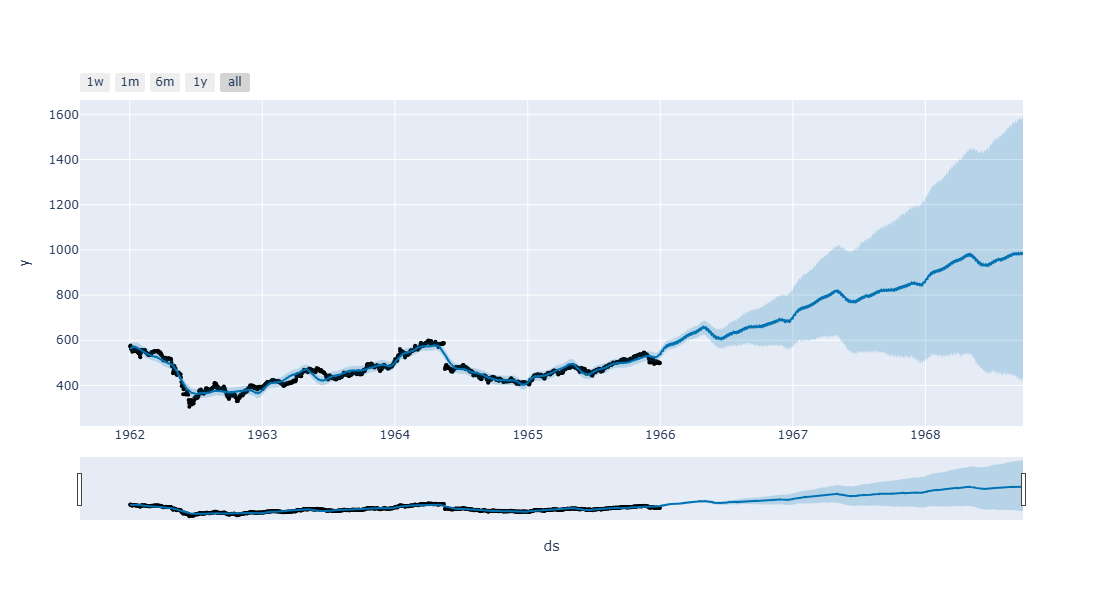

In [235]:
from prophet.plot import plot_plotly,plot_components_plotly
plot_plotly(m,forecast)

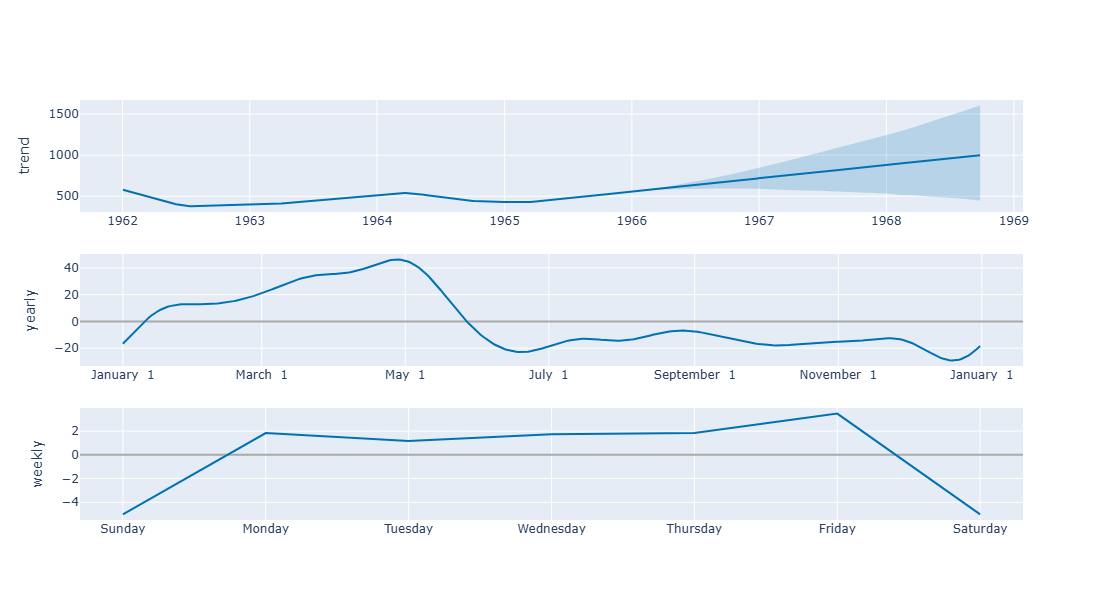

In [237]:
plot_components_plotly(m,forecast)

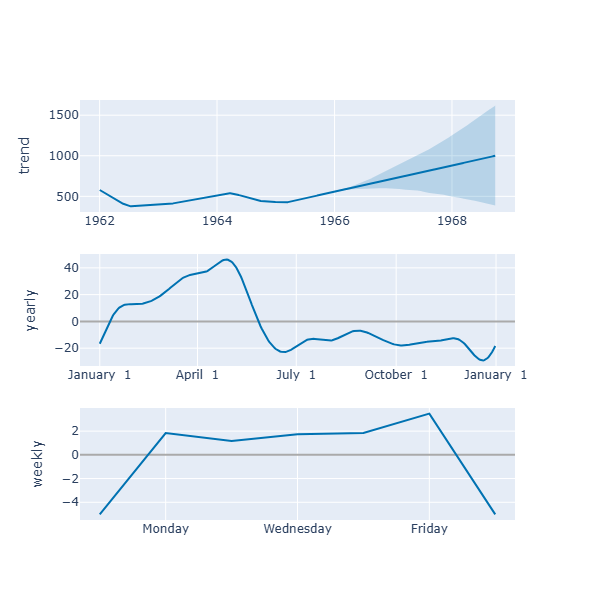

In [201]:
# Interactive components
fig2 = plot_components_plotly(m, forecast)
fig2

In [243]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='90 days')
df_p = performance_metrics(df_cv)
print(df_p.head())


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/6 [00:00<?, ?it/s]

11:03:10 - cmdstanpy - INFO - Chain [1] start processing
11:03:10 - cmdstanpy - INFO - Chain [1] done processing
11:03:11 - cmdstanpy - INFO - Chain [1] start processing
11:03:11 - cmdstanpy - INFO - Chain [1] done processing
11:03:11 - cmdstanpy - INFO - Chain [1] start processing
11:03:11 - cmdstanpy - INFO - Chain [1] done processing
11:03:12 - cmdstanpy - INFO - Chain [1] start processing
11:03:12 - cmdstanpy - INFO - Chain [1] done processing
11:03:12 - cmdstanpy - INFO - Chain [1] start processing
11:03:12 - cmdstanpy - INFO - Chain [1] done processing
11:03:13 - cmdstanpy - INFO - Chain [1] start processing
11:03:13 - cmdstanpy - INFO - Chain [1] done processing


  horizon         mse       rmse        mae      mape     mdape     smape  \
0  9 days  597.750480  24.448936  19.438386  0.040478  0.026846  0.041776   
1 10 days  723.036977  26.889347  21.625728  0.044714  0.034949  0.046261   
2 11 days  725.299203  26.931380  21.770117  0.044812  0.032178  0.046346   
3 12 days  723.037525  26.889357  21.641322  0.044489  0.029093  0.046012   
4 13 days  811.523978  28.487260  22.450743  0.046280  0.032433  0.048007   

   coverage  
0  0.569444  
1  0.516667  
2  0.522222  
3  0.534722  
4  0.506944  
